# PISA 2012 DATA ANALYSIS
## by Steve Choi
---
## Table of Contents
- [Introduction](#intro)
- [Preliminary Wrangling](#wrangle)
 - [Cleaning Data](#cleaning)
 - [Preparing Data](#prep)
 



<a name='intro'></a>
## Introduction
#### What is PISA?
> PISA (Programme for International Student Assessment) is a worldwide survey to evaluate educational systems by
measuring 15 to 16 years old students' performance on mathematics, science, and reading. The assessments are conducted 
by OECD (Organisation for Economic Co-operation and Development) every three years and are designed to guage how well 
students are prepared for real-life situations in the adult world.

#### PISA 2012 Data
> nearly 480,000 students in 65 countries

<a name='wrangle'></a>
## Preliminary Wrangling

> went over codebook thoroughly for each column

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read PISA data in chunks
lst = []

my_cols = [0, 1, 4, 12, 18, 19, 45, 46, 47, 49, 50, 52, 53, 411, 501, 502,\
           503, 504, 505, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550]


for chunk in pd.read_csv('data/pisa2012.csv', encoding='ISO-8859-1', index_col=0,\
                         low_memory=False, usecols=my_cols, chunksize=50000):
    lst.append(chunk)
    
df = pd.concat(lst, axis=0)

# clearing memory occupied by lst
del lst

# check
df.head()

,CNT,OECD,ST04Q01,ST08Q01,ST09Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q06,ST26Q07,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
1,Albania,Non-OECD,Female,None,None,No,Yes,No,No,No,...,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877
2,Albania,Non-OECD,Female,One or two times,None,Yes,Yes,Yes,Yes,Yes,...,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116
3,Albania,Non-OECD,Female,None,None,Yes,Yes,Yes,Yes,Yes,...,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643
4,Albania,Non-OECD,Female,None,None,Yes,Yes,Yes,Yes,Yes,...,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573
5,Albania,Non-OECD,Female,One or two times,None,Yes,No,Yes,Yes,Yes,...,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746


In [3]:
df.shape

(485490, 28)

In [4]:
# rename columns with more descriptive name
df.rename({    'CNT' : 'Country', 
           'ST04Q01' : 'Gender',
           'ST08Q01' : 'Late',
           'ST09Q01' : 'Skip',
           'ST26Q02' : 'Own_room',
           'ST26Q03' : 'Study_place',
           'ST26Q04' : 'Computer',
           'ST26Q06' : 'Internet',
           'ST26Q07' : 'Literature',
           'ST26Q09' : 'Art',
           'ST26Q10' : 'Textbooks'},
           axis='columns', inplace=True
          )

# check
df.head(3)

,Country,OECD,Gender,Late,Skip,Own_room,Study_place,Computer,Internet,Literature,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
1,Albania,Non-OECD,Female,None,None,No,Yes,No,No,No,...,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877
2,Albania,Non-OECD,Female,One or two times,None,Yes,Yes,Yes,Yes,Yes,...,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116
3,Albania,Non-OECD,Female,None,None,Yes,Yes,Yes,Yes,Yes,...,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643


In [5]:
# identify nulls
df.isnull().sum()

Country            0
OECD               0
Gender             0
Late            6347
Skip            6359
Own_room       15797
Study_place    13470
Computer       11613
Internet       12308
Literature     19630
Art            18241
Textbooks      14248
AGE              116
PV1MATH            0
PV2MATH            0
PV3MATH            0
PV4MATH            0
PV5MATH            0
PV1READ            0
PV2READ            0
PV3READ            0
PV4READ            0
PV5READ            0
PV1SCIE            0
PV2SCIE            0
PV3SCIE            0
PV4SCIE            0
PV5SCIE            0
dtype: int64

In [6]:
# number of rows with null values
df[df.isnull().any(axis=1)].shape[0]

34492

In [7]:
# drop nulls
df.dropna(inplace=True)

# check
df.shape

(450998, 28)

In [8]:
# any duplicates?
df.duplicated().sum()

0

#### Preparing Data Analysis

In [9]:
# Compute the mean plausible values on each subject per students and store them

# Math
df['Math'] = np.mean(df.iloc[:,13:18], axis=1)

# Reading
df['Reading'] = np.mean(df.iloc[:,18:23], axis=1)

# Science
df['Science'] = np.mean(df.iloc[:,23:28], axis=1)

# Check
df.head(3)

,Country,OECD,Gender,Late,Skip,Own_room,Study_place,Computer,Internet,Literature,...,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,Math,Reading,Science
1,Albania,Non-OECD,Female,None,None,No,Yes,No,No,No,...,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,366.18634,261.01424,371.91348
2,Albania,Non-OECD,Female,One or two times,None,Yes,Yes,Yes,Yes,Yes,...,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,470.56396,384.68832,478.12382
3,Albania,Non-OECD,Female,None,None,Yes,Yes,Yes,Yes,Yes,...,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,505.53824,405.18154,486.60946


In [10]:
# drop unnecessary Plausible Value columns
df.drop(columns=df.columns[13:28], inplace=True)

# check
df.head(3)

,Country,OECD,Gender,Late,Skip,Own_room,Study_place,Computer,Internet,Literature,Art,Textbooks,AGE,Math,Reading,Science
1,Albania,Non-OECD,Female,None,None,No,Yes,No,No,No,No,Yes,16.17,366.18634,261.01424,371.91348
2,Albania,Non-OECD,Female,One or two times,None,Yes,Yes,Yes,Yes,Yes,Yes,Yes,16.17,470.56396,384.68832,478.12382
3,Albania,Non-OECD,Female,None,None,Yes,Yes,Yes,Yes,Yes,Yes,Yes,15.58,505.53824,405.18154,486.60946


In [11]:
# Replace values in Possession-related columns with True for 'Yes' and False for 'No'
df.iloc[:,5:12] = df.iloc[:,5:12].replace({'No': False, 'Yes':True})

# check
df.head(3)

,Country,OECD,Gender,Late,Skip,Own_room,Study_place,Computer,Internet,Literature,Art,Textbooks,AGE,Math,Reading,Science
1,Albania,Non-OECD,Female,None,None,False,True,False,False,False,False,True,16.17,366.18634,261.01424,371.91348
2,Albania,Non-OECD,Female,One or two times,None,True,True,True,True,True,True,True,16.17,470.56396,384.68832,478.12382
3,Albania,Non-OECD,Female,None,None,True,True,True,True,True,True,True,15.58,505.53824,405.18154,486.60946


In [12]:
# Create 'Possession' column which represents the number of a student possesses out of 7 items
df['Possessions'] = df.iloc[:,5:12].sum(axis=1)

# check
df.head()

,Country,OECD,Gender,Late,Skip,Own_room,Study_place,Computer,Internet,Literature,Art,Textbooks,AGE,Math,Reading,Science,Possessions
1,Albania,Non-OECD,Female,None,None,False,True,False,False,False,False,True,16.17,366.18634,261.01424,371.91348,2
2,Albania,Non-OECD,Female,One or two times,None,True,True,True,True,True,True,True,16.17,470.56396,384.68832,478.12382,7
3,Albania,Non-OECD,Female,None,None,True,True,True,True,True,True,True,15.58,505.53824,405.18154,486.60946,7
4,Albania,Non-OECD,Female,None,None,True,True,True,True,True,True,True,15.67,449.45476,477.46376,453.97240,7
5,Albania,Non-OECD,Female,One or two times,None,True,False,True,True,True,True,True,15.50,385.50398,256.01010,367.15778,6


## Univariate Exploration

> 1. Number of participated students in each country 

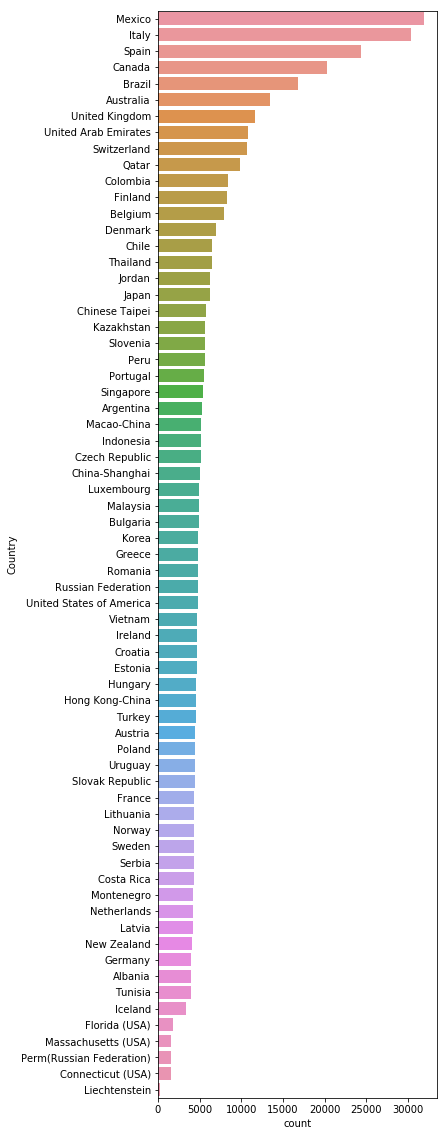

In [27]:
country_order = df['Country'].value_counts().index

plt.figure(figsize=(5, 20))
sns.countplot(data=df, y='Country', order=country_order);

> 2. World vs Canada

In [49]:
perf_world = np.mean(df[df['Country'] != 'Canada'].iloc[:, 13:16])
perf_world

Math       472.533302
Reading    474.983050
Science    478.761374
dtype: float64

In [50]:
perf_can = np.mean(df[df['Country'] == 'Canada'].iloc[:, 13:16])
perf_can

Math       512.960331
Reading    514.948127
Science    518.039382
dtype: float64

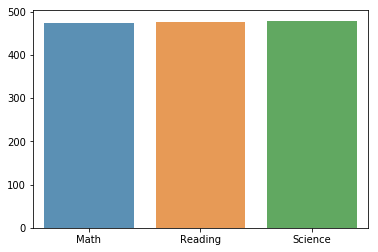

In [55]:
sns.barplot(x=perf_world.index, y=perf_world, alpha=0.8);

- About Country: https://www.oecd.org/pisa/pisaproducts/PISA%202012%20Technical%20Report_Chapter%2019.pdf

> Note that for several PISA 2012 participants the value for the CNT variable does not correspond to this classification system. This occurs for two possible reasons. Firstly, where a National Centre represents only part of the country. The codes of this type are QCN for Shanghai representing part of China, QCY for part of Cyprus, QRS for the Perm region of the Russian Federation, QUA,
QUB and QUC for the three states of the United States, Florida, Connecticut and Massachusetts correspondingly. Secondly,
where the National Centre represented only part of the country in a previous cycle, and even though the full country is
participating in PISA 2012, the CNT value has been preserved for consistency. The only participant’s code of this type
is ARE for the United Arab Emirates.

### Testing

In [9]:
# read pisa - dictionaries (column descriptions)
df_colname = pd.read_csv('data/pisadict2012.csv', encoding='ISO-8859-1')

In [7]:
for i in df_colname.index:
    print('{}-{} : {}'.format(i+1,df_colname['Unnamed: 0'].iloc[i], df_colname['x'].iloc[i]))

1-CNT : Country code 3-character
2-SUBNATIO : Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)
3-STRATUM : Stratum ID 7-character (cnt + region ID + original stratum ID)
4-OECD : OECD country
5-NC : National Centre 6-digit Code
6-SCHOOLID : School ID 7-digit (region ID + stratum ID + 3-digit school ID)
7-STIDSTD : Student ID
8-ST01Q01 : International Grade
9-ST02Q01 : National Study Programme
10-ST03Q01 : Birth - Month
11-ST03Q02 : Birth -Year
12-ST04Q01 : Gender
13-ST05Q01 : Attend <ISCED 0>
14-ST06Q01 : Age at <ISCED 1>
15-ST07Q01 : Repeat - <ISCED 1>
16-ST07Q02 : Repeat - <ISCED 2>
17-ST07Q03 : Repeat - <ISCED 3>
18-ST08Q01 : Truancy - Late for School
19-ST09Q01 : Truancy - Skip whole school day
20-ST115Q01 : Truancy - Skip classes within school day
21-ST11Q01 : At Home - Mother
22-ST11Q02 : At Home - Father
23-ST11Q03 : At Home - Brothers
24-ST11Q04 : At Home - Sisters
25-ST11Q05 : At Home - Grandparents
26-ST11Q06 : At Home - Others
27-ST13Q

In [48]:
# number of students participated in each country by gender
df.groupby(['Country', 'Gender']).count().iloc[:,0]

Country                   Gender
Albania                   Female     1999
                          Male       1981
Argentina                 Female     2795
                          Male       2474
Australia                 Female     6612
                          Male       6804
Austria                   Female     2256
                          Male       2256
Belgium                   Female     4019
                          Male       3926
Brazil                    Female     8839
                          Male       8018
Bulgaria                  Female     2418
                          Male       2468
Canada                    Female    10357
                          Male       9887
Chile                     Female     3361
                          Male       3178
China-Shanghai            Female     2604
                          Male       2499
Chinese Taipei            Female     3024
                          Male       2792
Colombia                  Female     4391
 

In [49]:
df.groupby(['Country', 'Gender']).count().iloc[:,0]['Albania']

Gender
Female    1999
Male      1981
Name: OECD, dtype: int64

In [3]:
# ggplot2 example
'''
install.packages('ggplot2')
library(ggplot2)

df = read.csv(file.choose()) #select your dataset 
df2 = head(df, 30)


qplot(df2$Math.SAT, df2$Verbal.SAT, xlab = 'Math SAT Score', 
      ylab = 'Verbal SAT Score', main = 'Average SAT Scores By College')

qplot(df2$Math.SAT, df2$Verbal.SAT, xlab = 'Math SAT Score', 
      ylab = 'Verbal SAT Score', main = 'Average SAT Scores By College', 
      color = as.factor(df2$Public..1...Private..2.))

qplot(df2$Math.SAT, df2$Verbal.SAT, xlab = 'Math SAT Score',
      ylab = 'Verbal SAT Score', main = 'Average SAT Scores By College',
      shape = as.factor(df2$Public..1...Private..2.), color = df2$stud..fac..ratio)

ggplot(df2, aes(x=Math.SAT, y=Verbal.SAT, group=stud..fac..ratio)) +
  geom_point(aes(shape=stud..fac..ratio, color=as.factor(df2$Public..1...Private..2.))
'''

"\ninstall.packages('ggplot2')\nlibrary(ggplot2)\n\ndf = read.csv(file.choose()) #select your dataset \ndf2 = head(df, 30)\n\n\nqplot(df2$Math.SAT, df2$Verbal.SAT, xlab = 'Math SAT Score', \n      ylab = 'Verbal SAT Score', main = 'Average SAT Scores By College')\n\nqplot(df2$Math.SAT, df2$Verbal.SAT, xlab = 'Math SAT Score', \n      ylab = 'Verbal SAT Score', main = 'Average SAT Scores By College', \n      color = as.factor(df2$Public..1...Private..2.))\n\nqplot(df2$Math.SAT, df2$Verbal.SAT, xlab = 'Math SAT Score',\n      ylab = 'Verbal SAT Score', main = 'Average SAT Scores By College',\n      shape = as.factor(df2$Public..1...Private..2.), color = df2$stud..fac..ratio)\n\nggplot(df2, aes(x=Math.SAT, y=Verbal.SAT, group=stud..fac..ratio)) +\n  geom_point(aes(shape=stud..fac..ratio, color=as.factor(df2$Public..1...Private..2.))\n"

### Things to Consider
1. Color-blind friendly: Use blue-orange palette over red-green
2. Features for additional infor: different encodings
 - color & shape for categorical variables
 - marker size for quantitative variables

### Sample Questions
- How does the choice of school play into academic performance?
- Are there differences in achievement based on gender, location, or student attitudes?
- Are there differences in achievement based on teacher practices and attitudes?
- Does there exist inequality in academic achievement?

### Reference

1. PISA Contest: http://mi2.mini.pw.edu.pl:8080/SmarterPoland/PISAcontest/
2. PISA Survey Design: http://www.oecd.org/pisa/data/pisa2012technicalreport.htm
3. PISA Data and Codebooks: http://www.oecd.org/pisa/data/pisa2012database-downloadabledata.htm